In [1]:
from bs4 import BeautifulSoup as bs4
import requests
import nltk
from nltk.tokenize import RegexpTokenizer
import heapq
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/austie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
links = ['https://blog.collectivehealth.com/meet-the-collective-hi-abbie-d786e9518f2a?source=collection_home---4------0-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-jamie-9bd2007623a5?source=collection_home---4------1-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-ben-c94bd55e102d?source=collection_home---4------2-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-vita-a94b4ad71c0b?source=user_profile---------1-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-marianne-holt-director-of-benefits-innovation-15b6cdd531f9?source=user_profile---------2-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-haleigh-tebben-chief-business-development-officer-7c49c972e35e?source=user_profile---------3-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-quentin-blanton-1337ee28516f?source=user_profile---------4-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-dave-7d442265ce3a?source=user_profile---------5-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-karlene-1a6458f83091?source=user_profile---------6-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-alina-47e857703632?source=user_profile---------7-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-sanjay-basu-director-of-research-analytics-e2978bbdbfc7?source=user_profile---------8-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-carl-db7843f0ecef?source=user_profile---------9-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-kavita-d34ae5f0b65c?source=user_profile---------10-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-dina-segro-regional-vice-president-northeast-96d0677e9d13?source=user_profile---------11-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-jennifer-jacobs-vice-president-of-operations-4ac1a6afc26f?source=user_profile---------12-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-michael-nikunen-vice-president-of-strategic-accounts-1198438c7704?source=user_profile---------13-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-kevin-francis-chief-commercial-officer-5521a67a4780?source=user_profile---------14-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-karen-boone-joins-our-board-of-directors-8ae822cc0374?source=user_profile---------15-----------------------',
         'https://blog.collectivehealth.com/meet-the-collective-hi-laura-c3f39af7d447?source=user_profile---------16-----------------------']

sanjay = 'https://blog.collectivehealth.com/meet-the-collective-sanjay-basu-director-of-research-analytics-e2978bbdbfc7?source=user_profile---------8-----------------------'

In [9]:
text = []

for x in links:
    soup = bs4(requests.get(x).text).select('p')
    soup = soup[0].parent.parent.get_text()
    soup = re.split(r'(?<=[a-zA-Z”\s+])[.?!](?=[a-zA-Z“\s*])', soup)
    soup = '. '.join(soup)
    text.append(soup)

text = '\n'.join(text)

In [10]:
sanjay = bs4(requests.get(sanjay).text).select('p')
sanjay = sanjay[0].parent.parent.get_text()
sanjay = re.split(r'(?<=[a-zA-Z”\s+])[.?!](?=[a-zA-Z“\s*])', sanjay)
sanjay = '. '.join(sanjay)

In [11]:
tokenizer = RegexpTokenizer('\w+')

sent = nltk.sent_tokenize(text)
san_sent = nltk.sent_tokenize(sanjay)

In [12]:
words = tokenizer.tokenize(text)
san_words = tokenizer.tokenize(sanjay)
freq = nltk.FreqDist(words)
san_freq = nltk.FreqDist(sanjay)

In [13]:
max_freq = max(freq.values())
for word in freq.keys():
  freq[word] = freq[word]/max_freq
san_max = max(san_freq.values())
for word in san_freq.keys():
  san_freq[word] = san_freq[word]/san_max

In [14]:
sentence_scores = {}
for x in sent:
    for word in nltk.word_tokenize(x.lower()):
        if word in freq.keys():
            if len(x.split(' ')) < 30:
                if x not in sentence_scores.keys():
                    sentence_scores[x] = freq[word]
                else:
                    sentence_scores[x] += freq[word]
san_scores = {}
for x in san_sent:
    for word in nltk.word_tokenize(x.lower()):
        if word in san_freq.keys():
            if len(x.split(' ')) < 30:
                if x not in san_scores.keys():
                    san_scores[x] = san_freq[word]
                else:
                    san_scores[x] += san_freq[word]

In [15]:
summary_sentences = heapq.nlargest(27, sentence_scores, key=sentence_scores.get)

summary = '\n\n'.join(summary_sentences[12:])

print(summary)

with open('CH_interview_summary.txt', 'w') as f:
    for x in summary_sentences[12:]:
        f.write(f'{x}\n')
    f.close()

Employees’ minds tend to go to the perks of a company, but culture shows up in the minutiae of the day to day.

The fact that we can’t live up to that is pretty sad, so I love the idea of working for a company that’s going to make it better.

Coming from one of the most valued and impactful companies in the world, I wanted to work on something that I felt was destined to make a mark.

I’m just really excited to see the impact it’s going to be able to have as more and more companies bring it on to their platform.

My idea of a great day is hanging out in the backyard, spending time with the kids, and having a nice meal and bottle of wine.

One meal you’d eat for the rest of your life:The idea of eating one meal for the rest of my life is a real bummer.

In all industries and at companies of all sizes — employee healthcare needs to be central to your workforce strategy, demanding the attention of the C-suite.

What really drew me in was the reading the Medium article about why Ali and Ra

In [16]:
questions = '\n\n'.join(summary_sentences[:12])

print(questions)

with open('CH_questions.txt', 'w') as f:
    for x in summary_sentences[:12]:
        f.write(f'{x}\n')
    f.close()

As a kid, what did you want to be when you grew up and how does that inform what you do today.

What’s one of the most important lessons you’ve learned in your career.

What’s your favorite thing to do.

What happened in your career that led you to Collective Health.

What would you challenge the rest of the team to.

How would you explain what you do to a 5-year-old.

What excites you most about where Collective Health is going.

What’s the best thing about your job.

Why did you make the move.

What were you up to before Collective Health.

Where are you from.

As a kid, what did you want to be when you grew up.


In [17]:
san_ss = heapq.nlargest(10, san_scores, key=san_scores.get)

san_summary = '\n\n'.join(san_ss)

print(san_summary)

with open('CH_sanjay.txt', 'w') as f:
    for x in san_summary:
        f.write(f'{x}\n')
    f.close()

As I watched Collective Health systematically tackle these kinds of barriers to better healthcare, I realized I wanted to be part of the team.

I’m most excited that Collective Health is spearheading a genuine effort to engage in rigorous, objective, high-quality research to inform critical healthcare decisions.

My high school years were in Illinois and my parents still live there, so I consider myself a Midwesterner at heart.

I heard about the positive impact of Collective Health a few years ago.

I wanted to be a professional elephant keeper.

I think it’s critical to stay humble, especially when working in healthcare.

For example, workplace wellness programs — often touted as cost saving — have started to be subjected to critical review, and we’re seeing a lot of null results.

I was born in Washington, then moved to Texas, Arizona, and Illinois.

As a kid, what did you want to be when you grew up and how does that inform what you do today.

In many ways, though, fixing the U. S.

In [18]:
len(words)

13087

In [19]:
len(set(words))

2484

In [173]:
viz_words = [x for x in words if x not in nltk.corpus.stopwords.words('english')]
viz_words = [x for x in viz_words if x not in ['thing', 'min', 'really', 'wanted', 'way', 'want', 'going']]

In [174]:
viz_freq = nltk.FreqDist(viz_words)

In [178]:
x = heapq.nlargest(40, viz_freq, key=viz_freq.get)

In [195]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

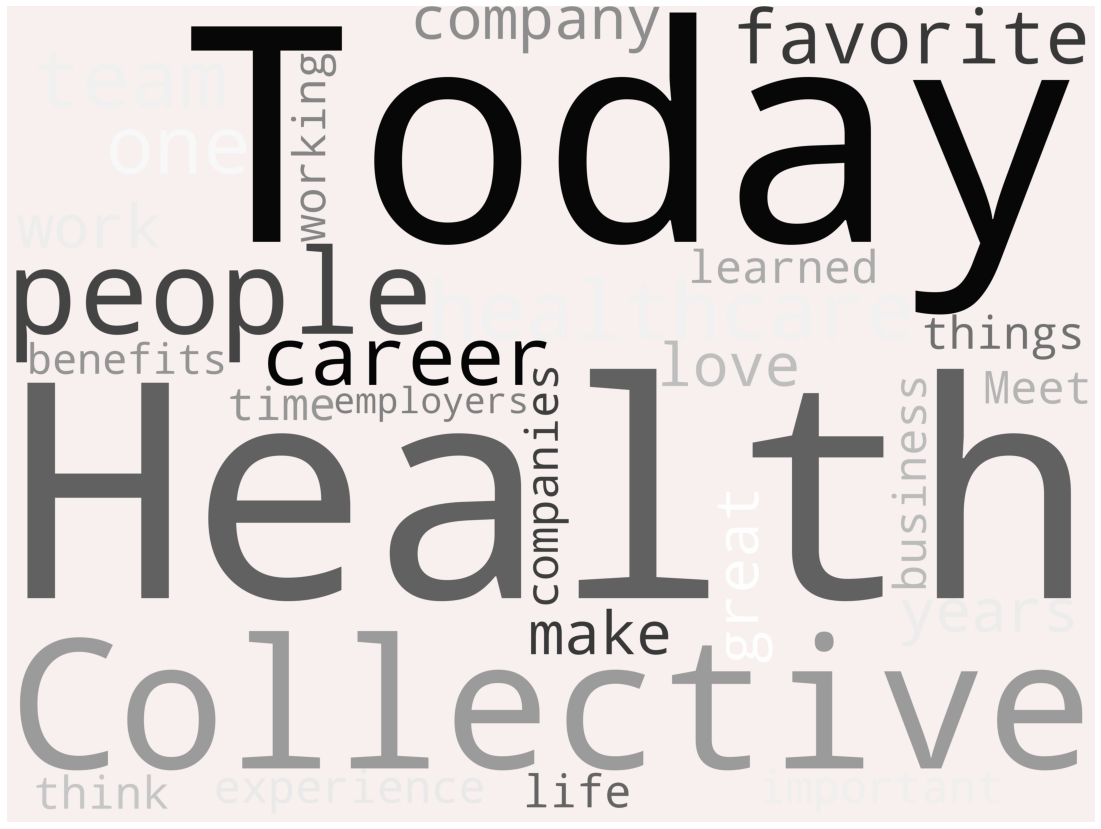

In [201]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='#f7f0ee', colormap='binary_r', collocations=False, stopwords=STOPWORDS).generate(' '.join(x))

plot_cloud(wordcloud)